# Example of Logistic Regression Prediction with the Titanic data from Kaggle

In [78]:
# Import pandas library and the data

import pandas as pd

data = pd.read_csv("titanic_data.csv")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
# Check the data

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

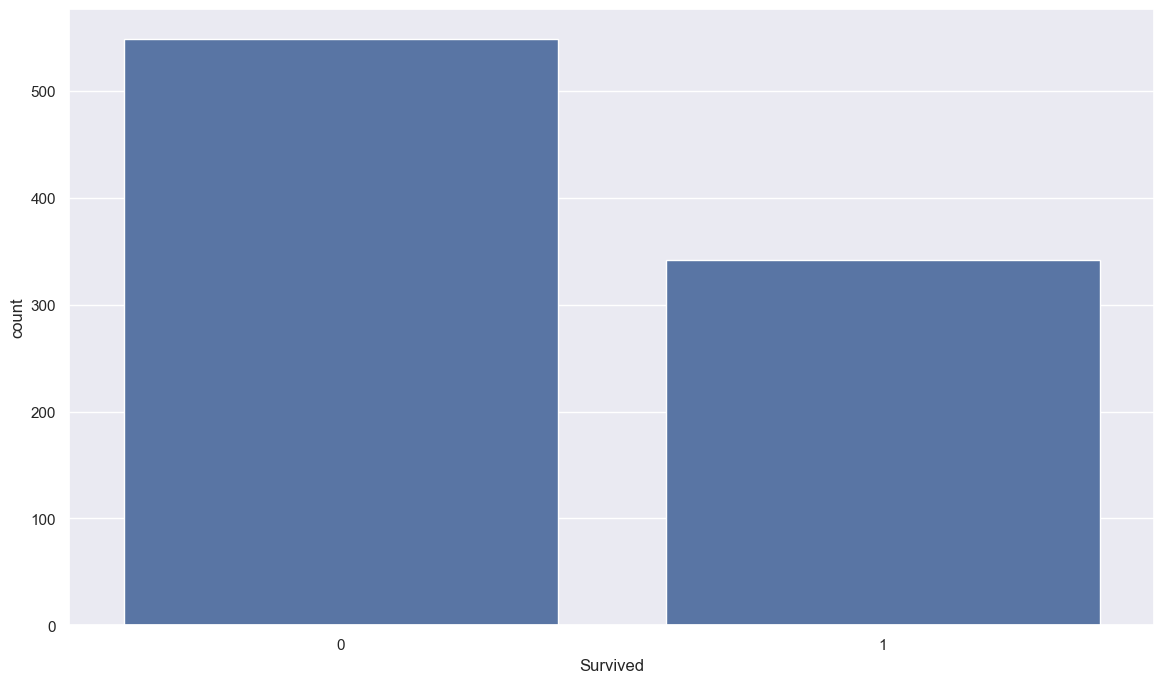

In [80]:
# Plot information

import seaborn as sb

sb.countplot(x="Survived", data=data)

<Axes: xlabel='Survived', ylabel='count'>

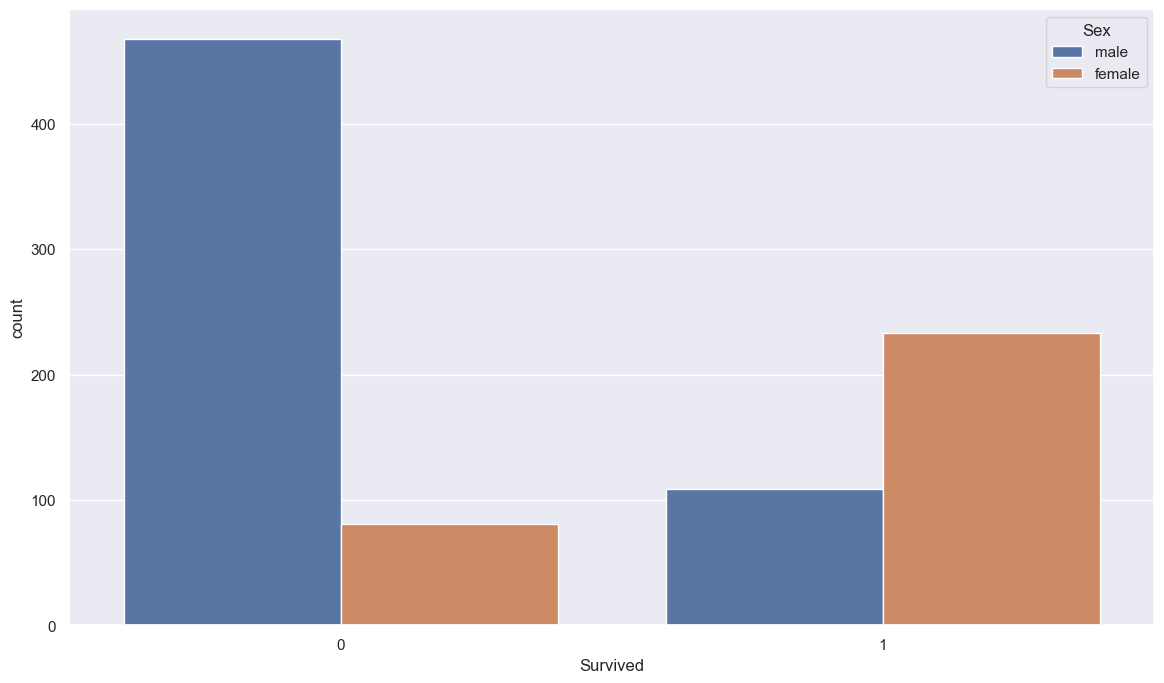

In [81]:
sb.countplot(x="Survived", data=data, hue="Sex")

In [82]:
# Clean the data: Analisys of the empty data

data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [83]:
# Clean the age with the average age

data["Age"] = data["Age"].fillna(data["Age"].mean())

data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [84]:
# Clean the cabin data

data = data.drop(["Cabin"],axis=1)

data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [85]:
# Clean the Embarked data

data = data.dropna()

data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [86]:
# Clean the non interesting columns

data = data.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [87]:
# Convert the sex data into an int and use one of the columns because of redundancy

dummies_sex = pd.get_dummies(data["Sex"], dtype=int, drop_first=True)

data = data.join(dummies_sex)

data = data.drop(["Sex"], axis=1)

In [88]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [89]:
# Convert the Embarked data into an int and remove one of the columns because of redundancy

dummies_embarked = pd.get_dummies(data["Embarked"], dtype=int, drop_first=True)

data = data.join(dummies_embarked)

data = data.drop(["Embarked"], axis=1)

In [90]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<Axes: >

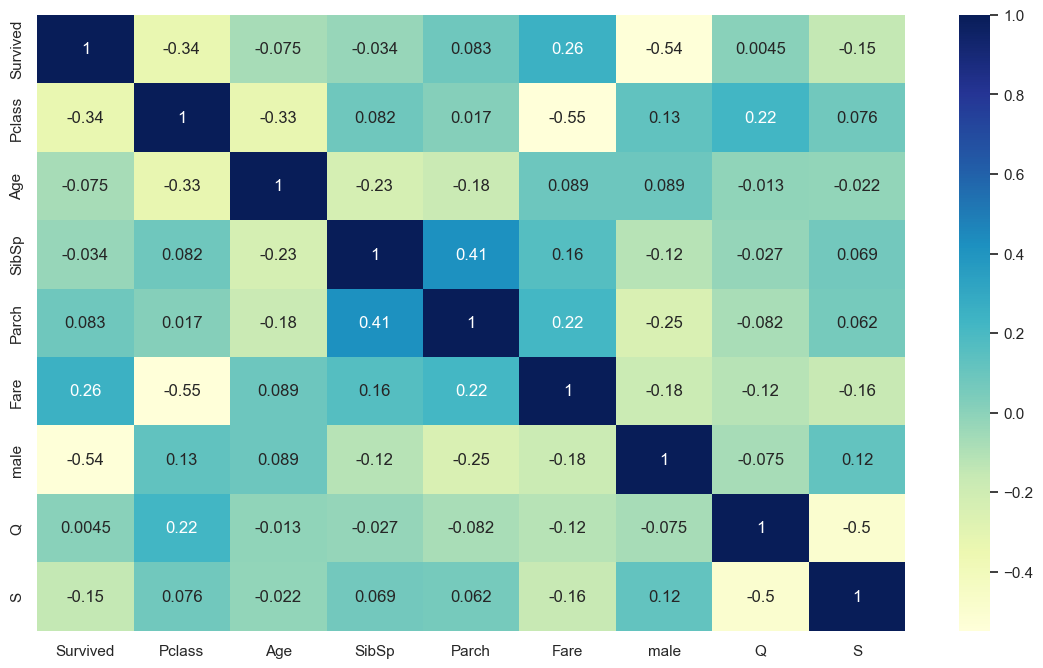

In [91]:
# Check correlations

sb.set_theme(rc={'figure.figsize':(14,8)})
sb.heatmap(data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

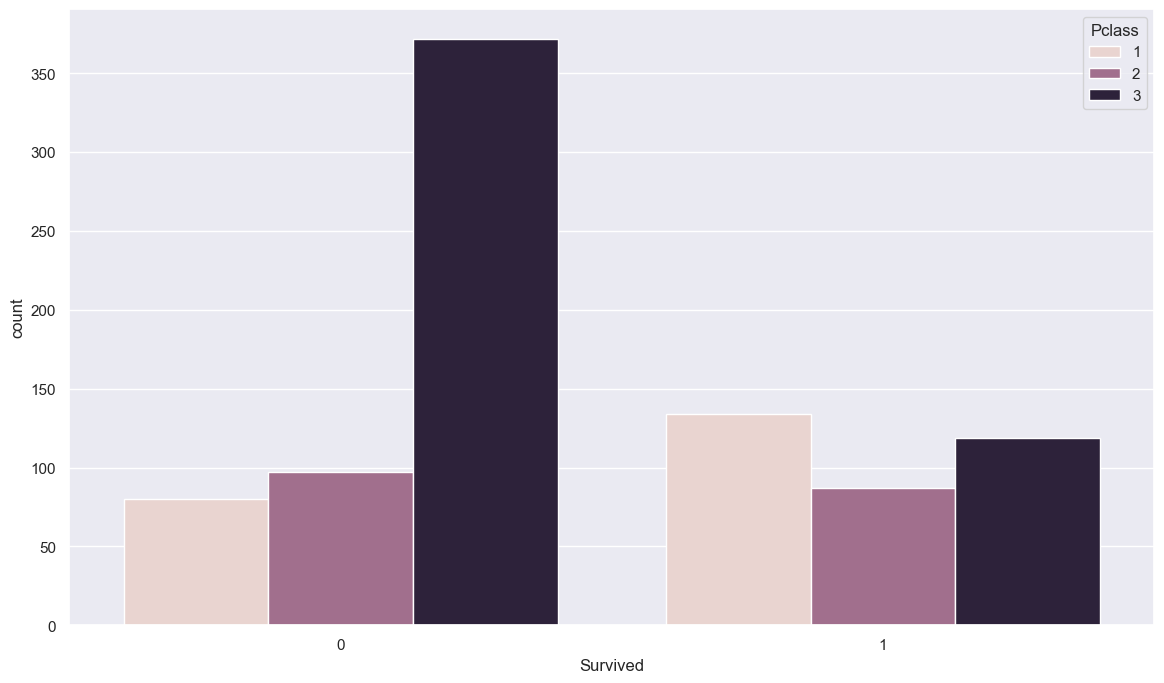

In [92]:
sb.countplot(x="Survived", data=data, hue="Pclass")

In [93]:
# To prepare the data to train the model: Characteristics and label

X = data.drop(["Survived"], axis=1)
y = data["Survived"]

In [94]:
# Set of training and set to test

from sklearn.model_selection import train_test_split

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=.2)

In [95]:
# Train the model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_training, y_training)

LogisticRegression(max_iter=1000)

In [96]:
# Test the model

predictions = model.predict(X_test)

from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, predictions), columns=["Pred: No", "Pred: Yes"], index=["Real: No", "Real: Yes"])


,Pred: No,Pred: Yes
Real: No,102,22
Real: Yes,19,35
